Packages

In [28]:
# Run first to import all the packages

import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.cm as cm



# Plotting the density in scatterplots
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

In [2]:
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

Importing the SPRITE dataset

In [14]:
# Enter the location of the SPRITE cluster file
data_file = "Z:/Nathan/Code/TFL/data/SPRITE/SPRITE.txt"



data_file_delimiter = '\t'

list_clusters = list()

df_contacts_RNA = pd.DataFrame()

rna = "Neat1"

cutoff = 3


list_contacts = list()


list_length_clusters = list()


# Loop the data lines
with open(data_file, 'r') as temp_f:
    # Read the lines
    lines = temp_f.readlines()

    for l in lines:
        
        column_list = l.split(data_file_delimiter)

        if len(column_list) > cutoff:
            
            for contact in column_list:
 
                if rna in contact:
                    for contact in column_list[1:]:
                        # Extracts everything between "_" and the end of the string
                        location = re.search(r"(?<=_)[^_]*$", contact).group()
                        new_line = {
                            "ID"         : column_list[0],
                            "Type"       : contact[0:3],
                            # Extracts the identification of the RNA or the stand if it is DNA
                            "RNA/strand" : re.search(r"(?<=\[).*?(?=\])", contact).group(),
                            # Extracts the chromosome, located before the :
                            "Chromosome" : re.search(r"^([^:]*)", location).group(),
                            # Extracts the region, located after the :
                            "region"     : re.search(r"(?<=:).*", location).group(),
                            # Extracts the start between : and -
                            "Start"      : int(re.search(r"(?<=:)(.*?)(?=-)", location).group()),
                            # Extracts the end between - and the end of the string
                            "End"        : int(re.search(r"(?!.*-)(?<=-)(.*)$", location).group())
                        }
                        list_contacts.append(new_line)
                    break
                    

lines = 0

df_contacts_RNA = pd.DataFrame.from_records(list_contacts)

df_contacts_RNA.head()


,ID,Type,RNA/strand,Chromosome,region,Start,End
0,NYBot41_Stg.Even2Bo9.DMSOC9.Even2Bo36.DMSOB7.1_5A,RPM,Neat1.lincRNA.exon;-,chr19,5845404-5845478,5845404,5845478
1,NYBot41_Stg.Even2Bo9.DMSOC9.Even2Bo36.DMSOB7.1_5A,DPM,+,chr3,86063557-86063595,86063557,86063595
2,NYBot41_Stg.Even2Bo9.DMSOC9.Even2Bo36.DMSOB7.1_5A,DPM,+,chr3,69097088-69097153,69097088,69097153
3,NYBot41_Stg.Even2Bo9.DMSOC9.Even2Bo36.DMSOB7.1_5A,DPM,+,chr3,86063530-86063594,86063530,86063594
4,NYBot41_Stg.Even2Bo9.DMSOC9.Even2Bo36.DMSOB7.1_5A,DPM,-,chr3,84905986-84906007,84905986,84906007


Importing HRS_seq data

In [10]:
df_HRS_seq = pd.read_csv("Z:/Nathan/Code/TFL/data/HRS_seq/listHRS_ES_avecDESeq_refgenom.csv",
                         sep = ";")


Binning mice chromosomes



In [11]:
mice_chromosomes = {
    "chr1" : 195e6,
    "chr2" : 182e6,
    "chr3" : 160e6,
    "chr4" : 157e6,
    "chr5" : 152e6,
    "chr6" : 150e6,
    "chr7" : 145e6,
    "chr8" : 130e6,
    "chr9" : 124e6,
    "chr10" : 131e6,
    "chr11" : 122e6,
    "chr12" : 120e6,
    "chr13" : 121e6,
    "chr14" : 125e6,
    "chr15" : 104e6,
    "chr16" : 98e6,
    "chr17" : 95e6,
    "chr18" : 91e6,
    "chr19" : 61e6,
    "chrX" : 169e6
}

mice_bins = {}

bin_start = 0

bin_size = 8e5

for chrom_name in mice_chromosomes.keys():
    bin_start = 0
    bins_chromosome = list()

    while bin_start < mice_chromosomes[chrom_name]:
        bins_chromosome.append(bin_start)
        bin_start += bin_size
    
    mice_bins[chrom_name] = bins_chromosome


Plot the contact counts for each chromosome + counts

C:\Users\nlecouvreur\AppData\Local\Temp\ipykernel_27840\609417593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_contacts_DNA["Pos"] = df_contacts_DNA["Start"] + ((df_contacts_DNA["End"] - df_contacts_DNA["Start"])/2)
C:\Users\nlecouvreur\AppData\Local\Temp\ipykernel_27840\609417593.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for title, group in df_contacts_DNA.groupby(["Chromosome"]):


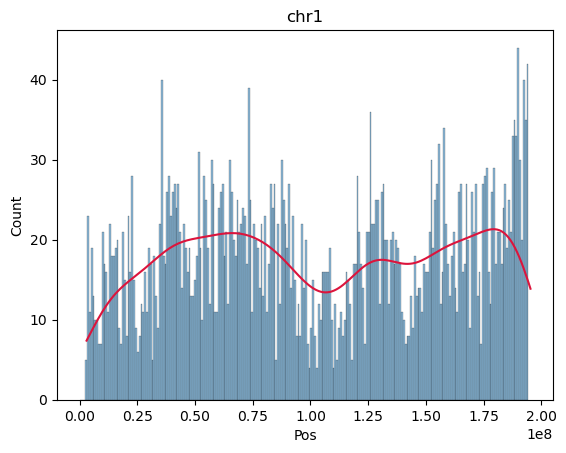

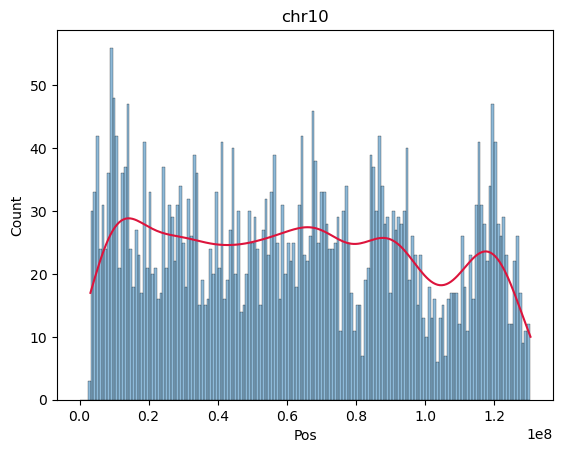

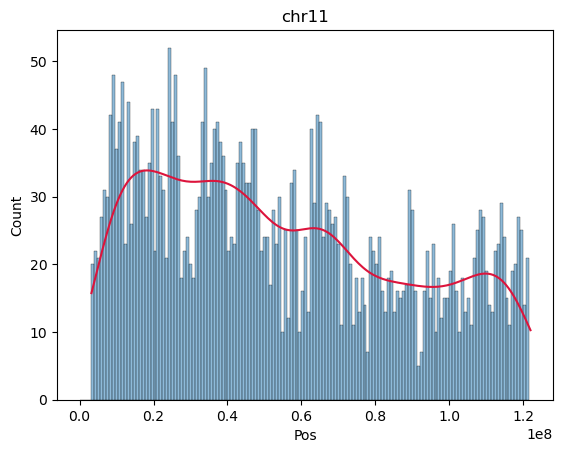

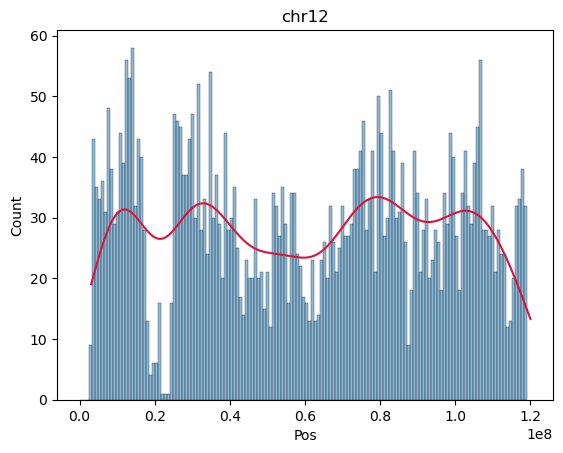

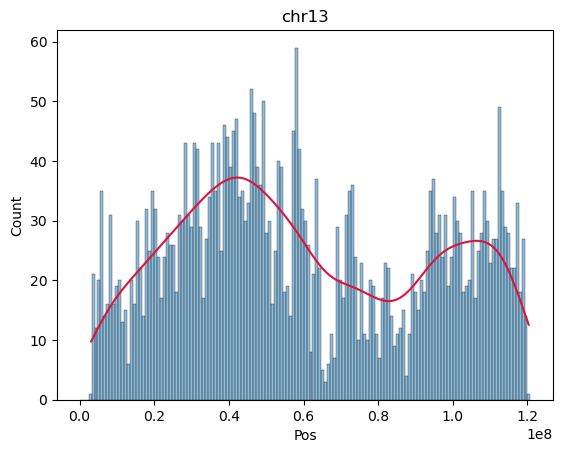

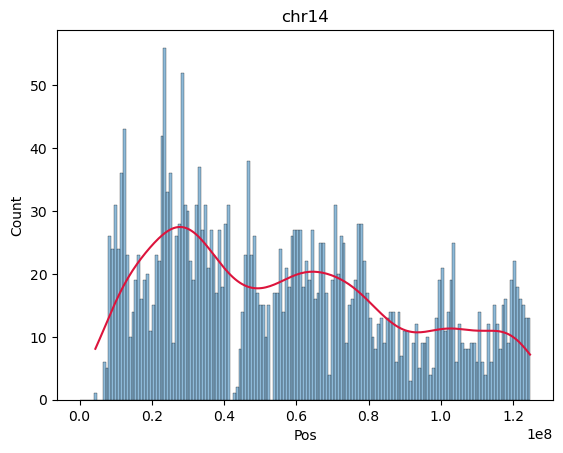

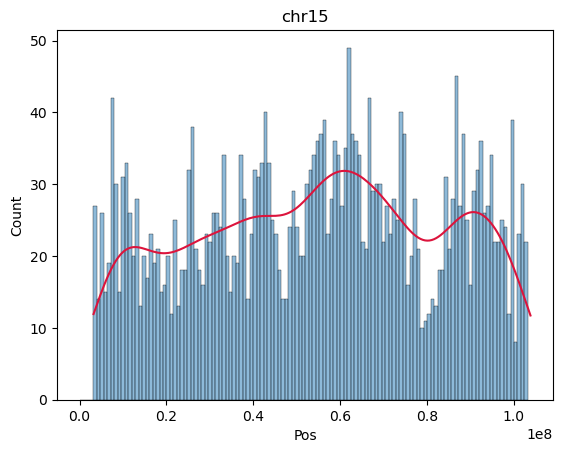

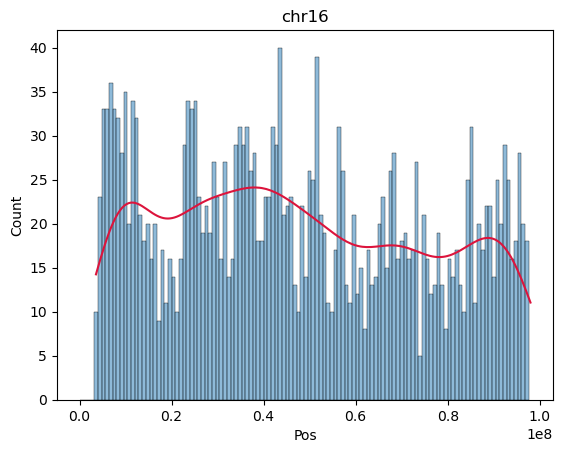

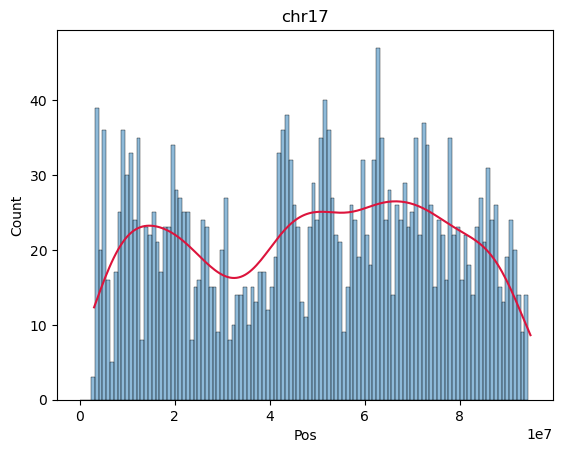

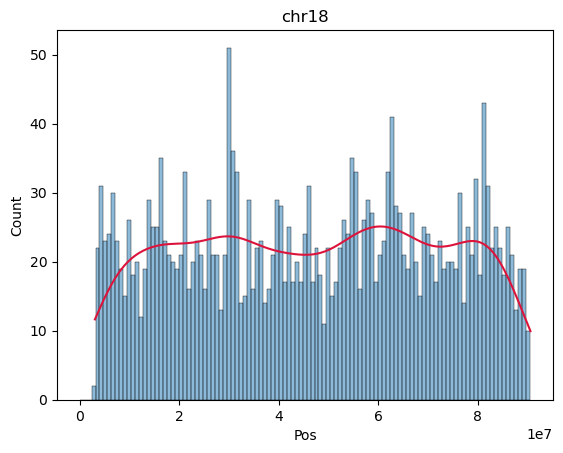

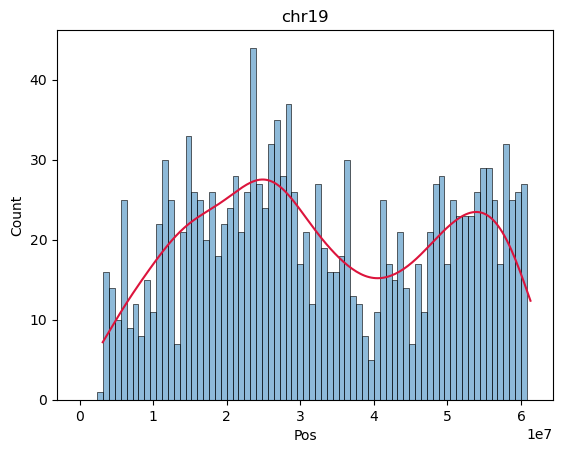

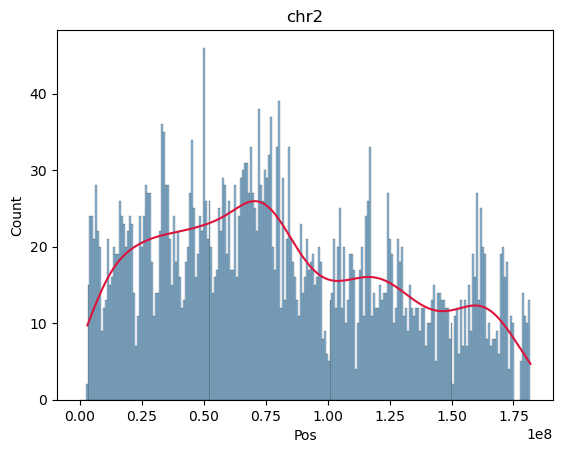

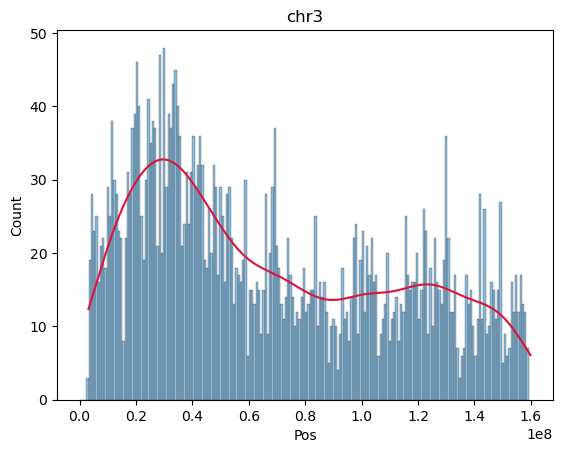

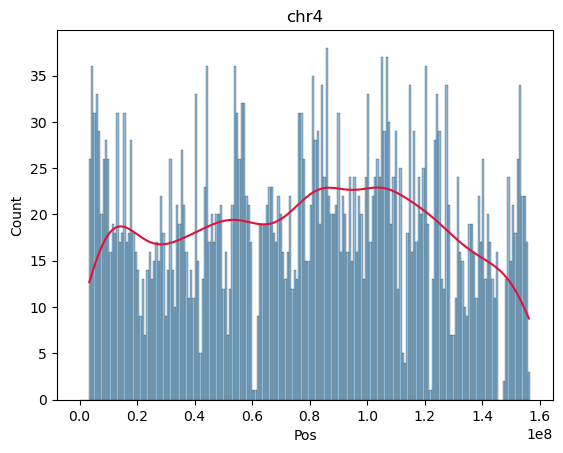

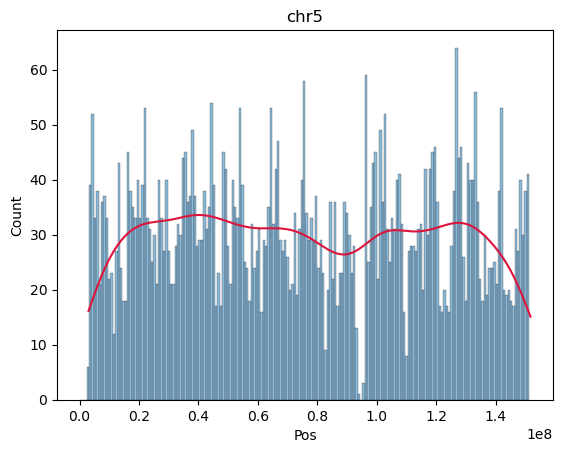

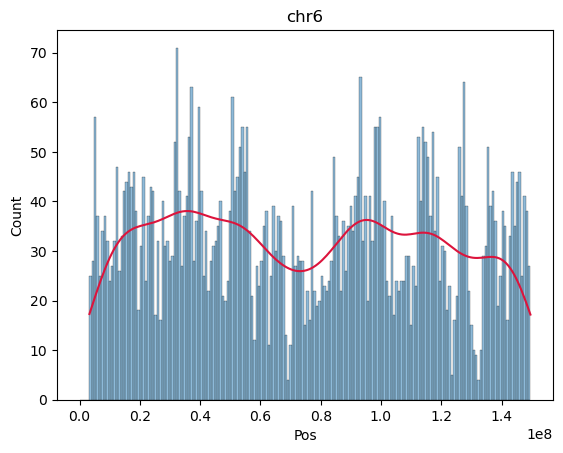

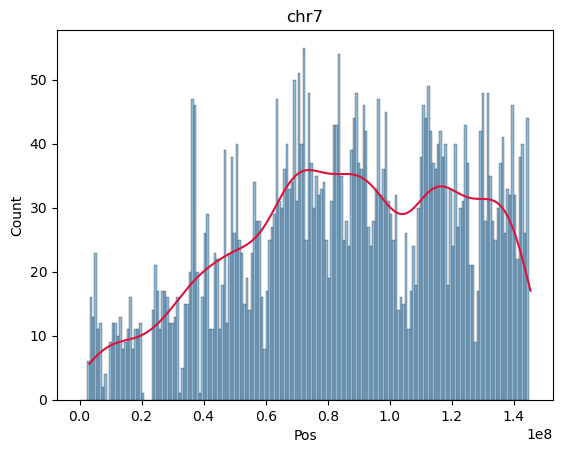

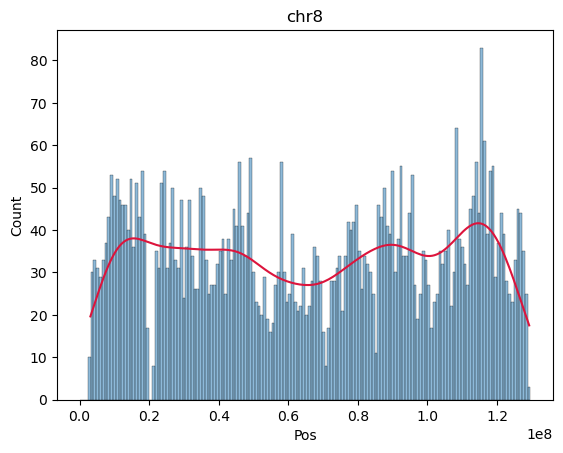

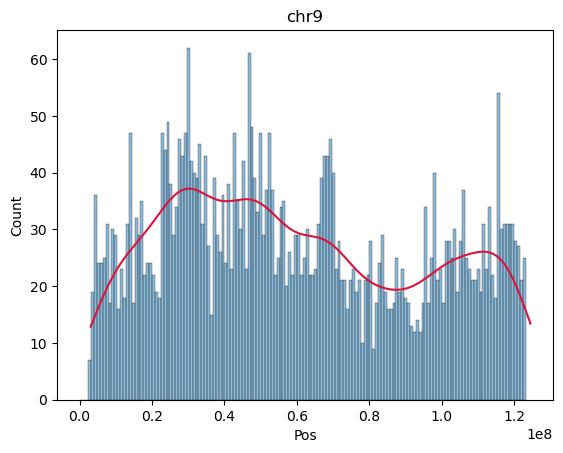

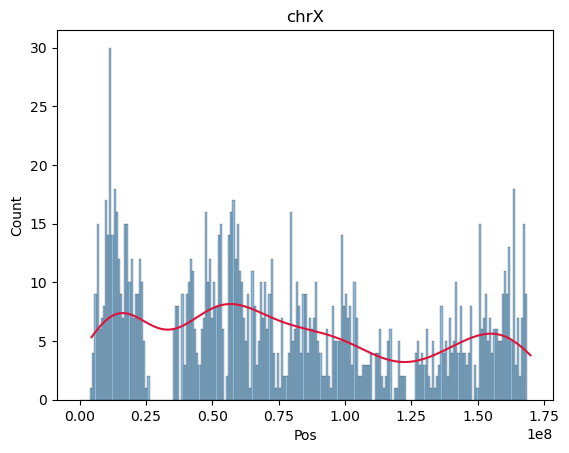

In [12]:

df_contacts_DNA = df_contacts_RNA.query("Type == 'DPM'")
df_contacts_DNA["Pos"] = df_contacts_DNA["Start"] + ((df_contacts_DNA["End"] - df_contacts_DNA["Start"])/2)

df_contacts_binned = pd.DataFrame(columns = ["chromosome",
                                             "counts",
                                             "bins"])

for title, group in df_contacts_DNA.groupby(["Chromosome"]):

    ax = sns.histplot(data = group,
                      x = "Pos",
                      bins = mice_bins[title],
                      kde = True)
    ax.lines[0].set_color('crimson')
    plt.title(title)
    plt.show()    


    n, bins = np.histogram(group["Pos"],
                           bins = mice_bins[title])

    chroms = np.full(shape = (len(n)),
                     fill_value = title)

    new_lines = {"chromosome" : chroms,
                 "counts" : list(n),
                 "bins" : list(bins[1:])}

    df_chrom = pd.DataFrame(new_lines)

    df_contacts_binned = pd.concat([df_contacts_binned, df_chrom],
                                   axis = 0,
                                   ignore_index = True)




Normalizing the counts to the whole chromosome

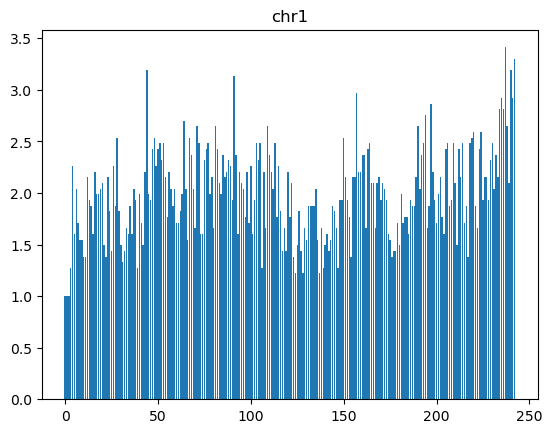

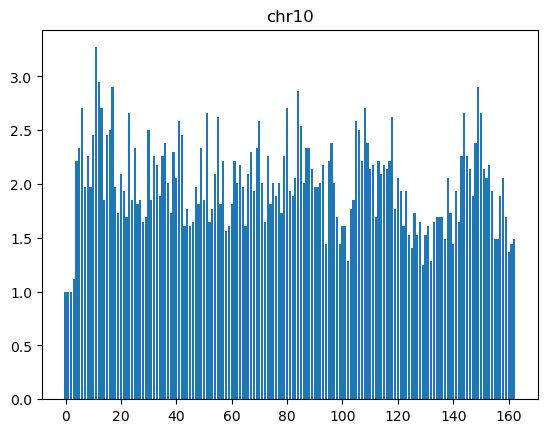

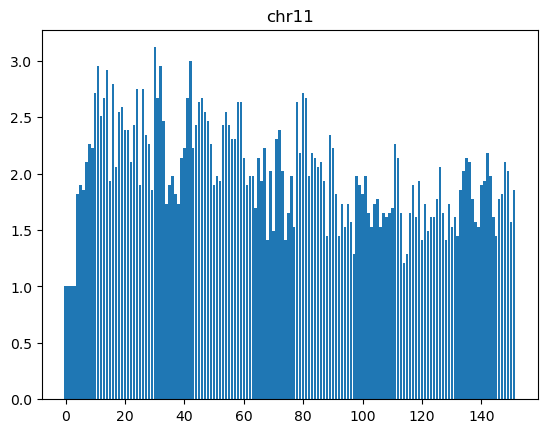

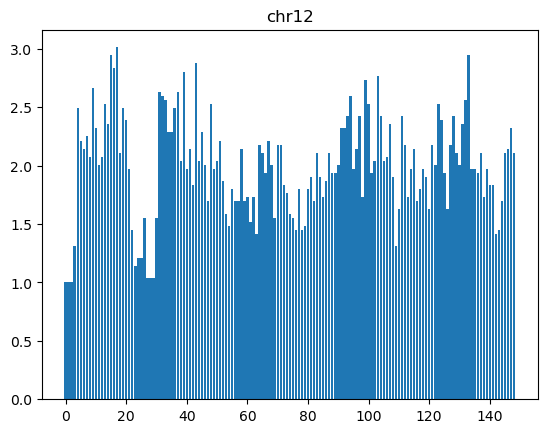

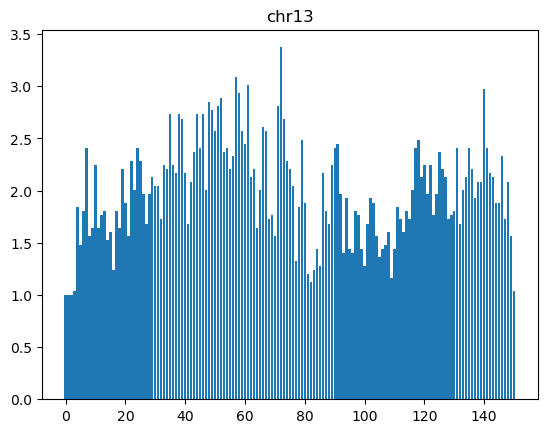

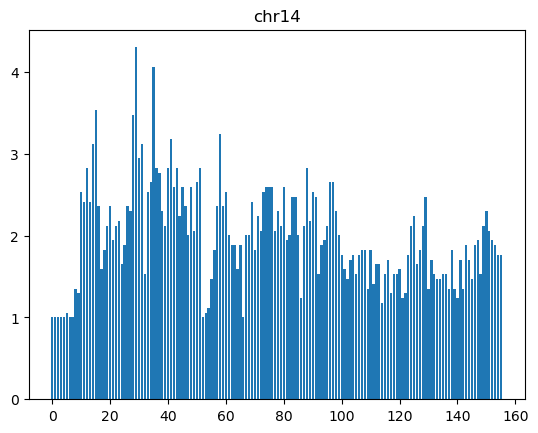

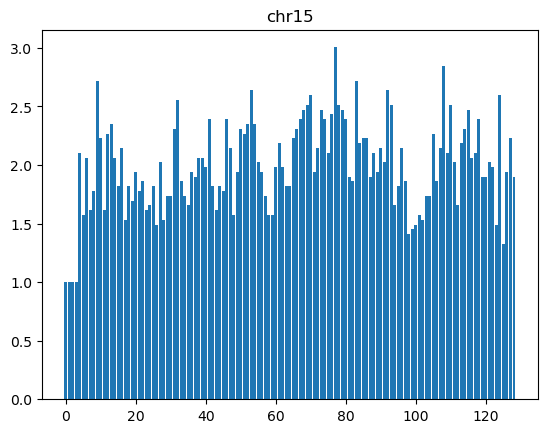

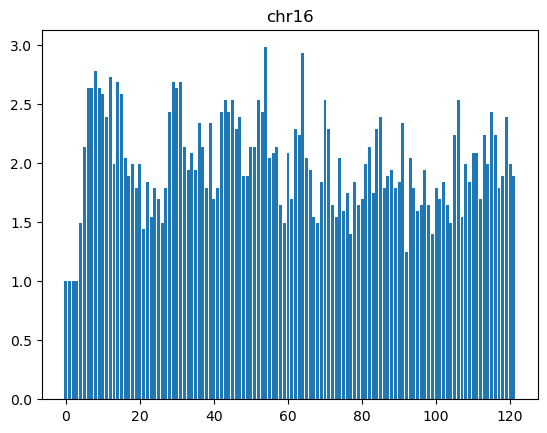

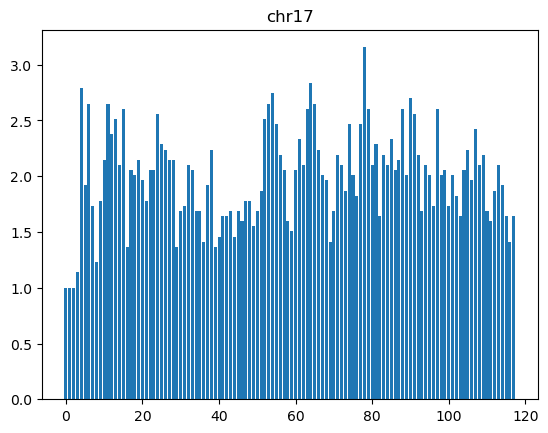

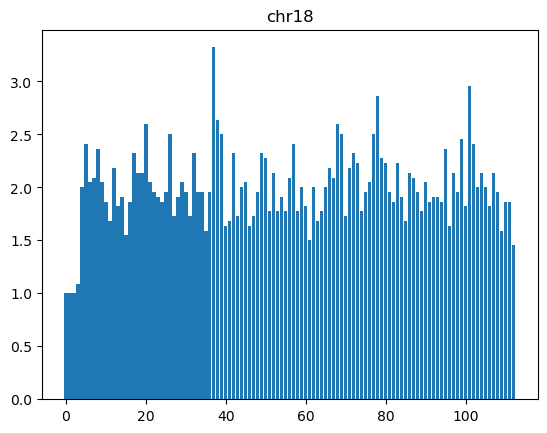

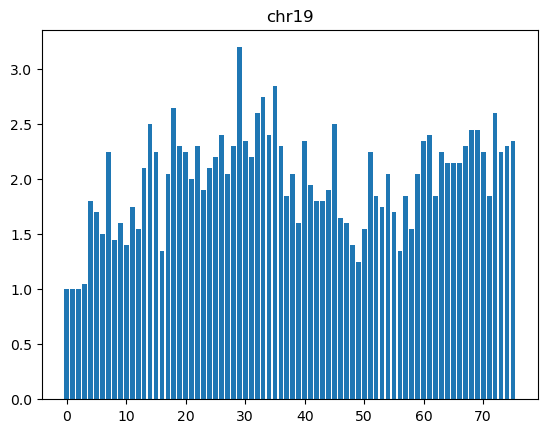

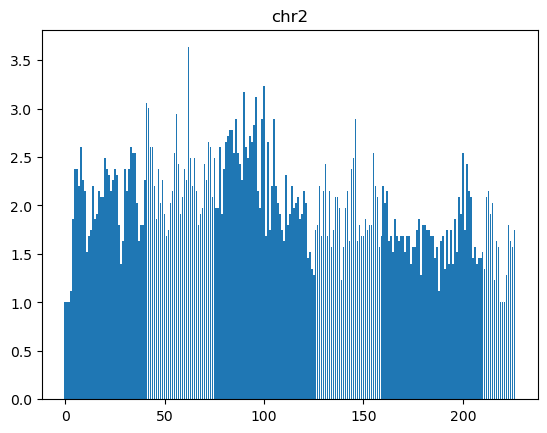

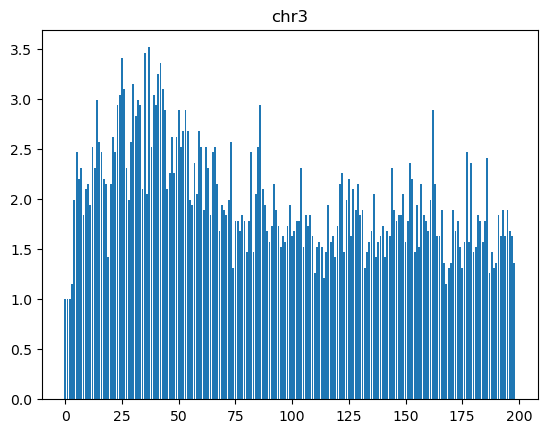

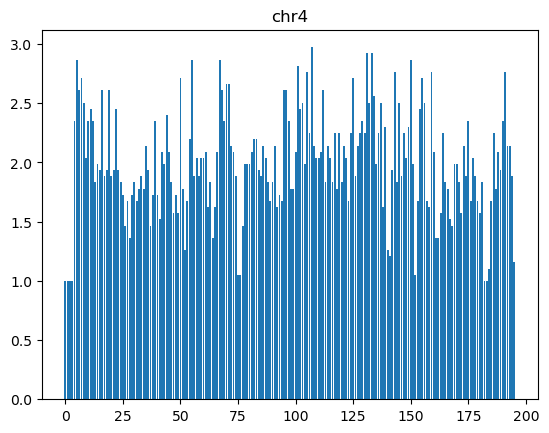

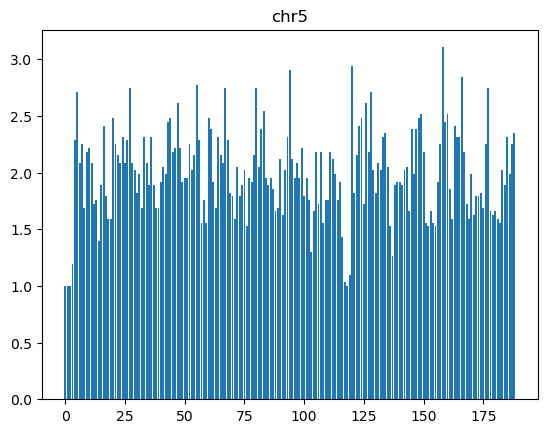

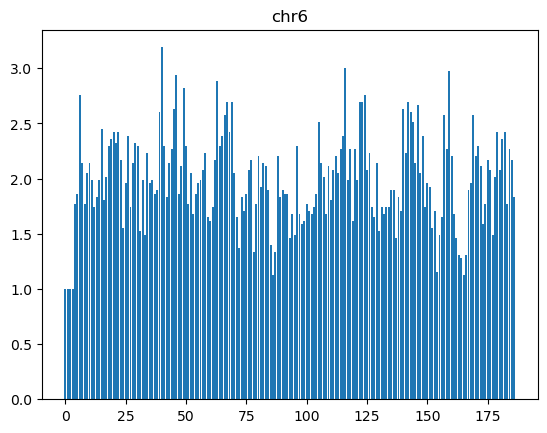

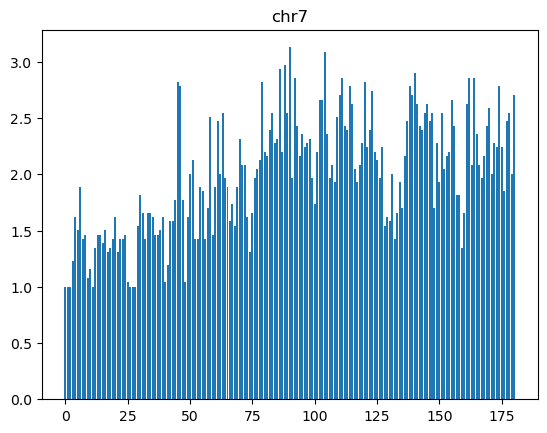

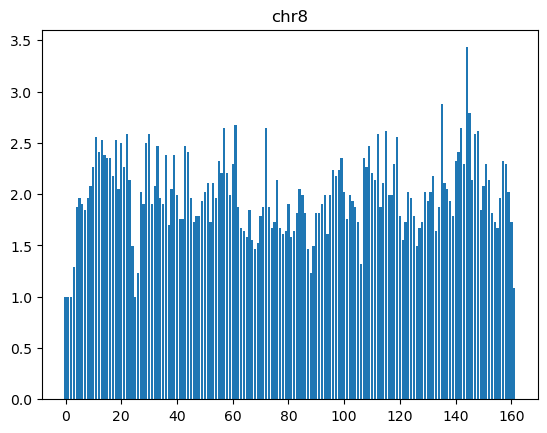

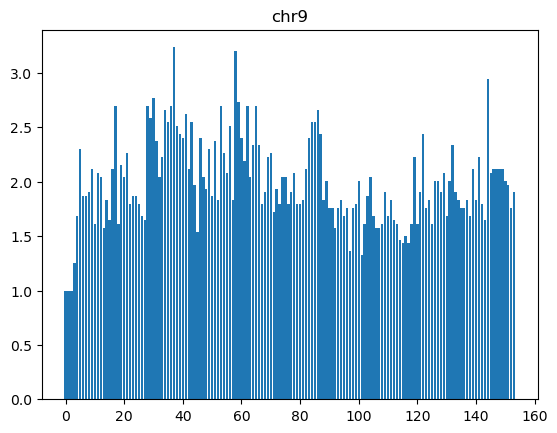

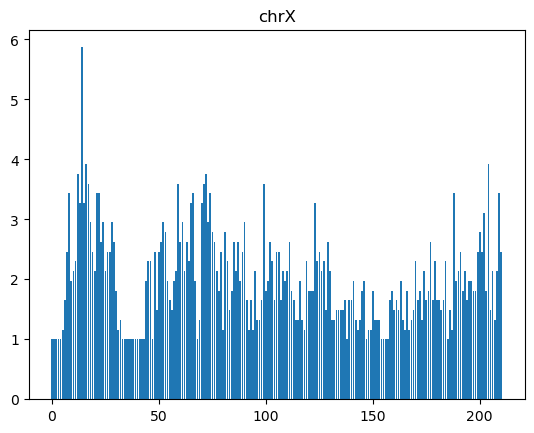

In [13]:
df_means_chrom = df_contacts_binned.groupby("chromosome")["counts"].mean()

df_contacts_normalised = df_contacts_binned.merge(df_means_chrom, 
                                                  on = "chromosome")

df_contacts_normalised["counts_normalised"] = (df_contacts_normalised["counts_x"] / 
                                               df_contacts_normalised["counts_y"]) + 1

for title, group in df_contacts_normalised.groupby("chromosome"):
    plt.clf()
    plt.bar(x = range(len(group["bins"])),
            height = group["counts_normalised"],
            edgecolor = None)
    plt.title(title)
    plt.show()

Binning the HRS_seq data

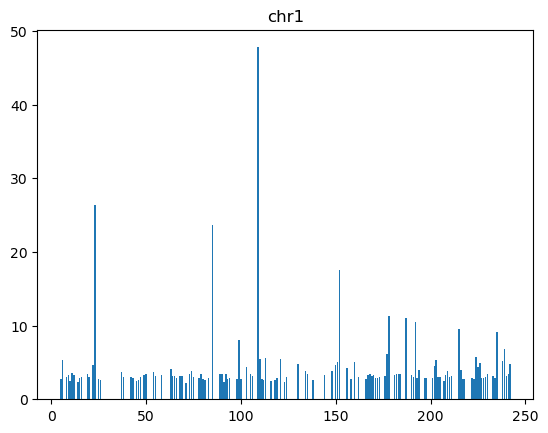

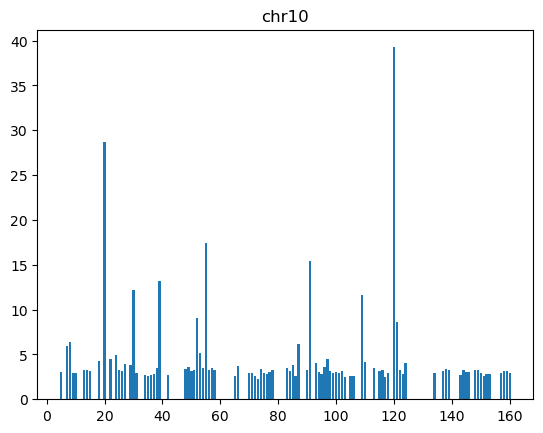

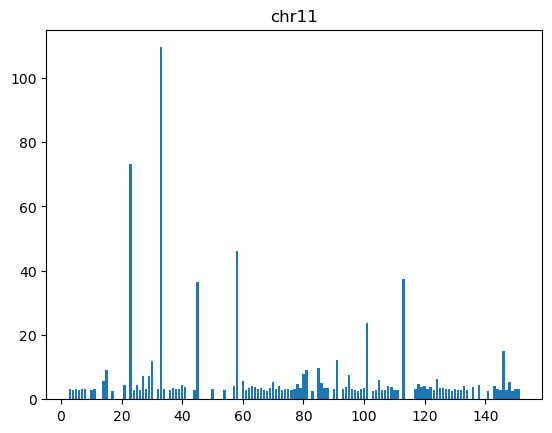

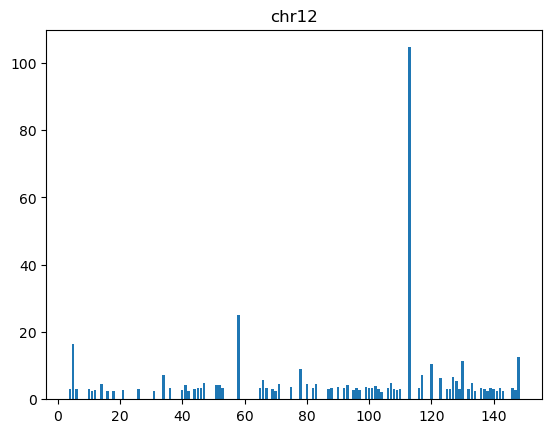

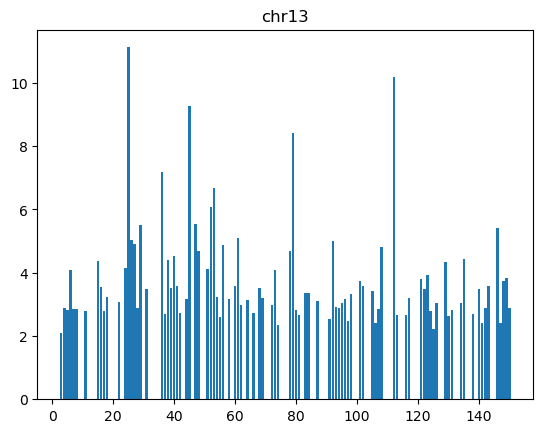

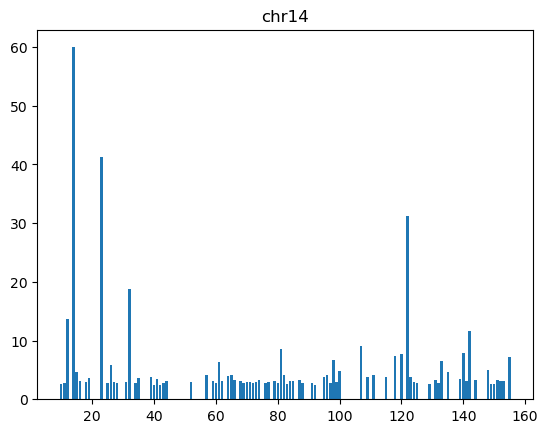

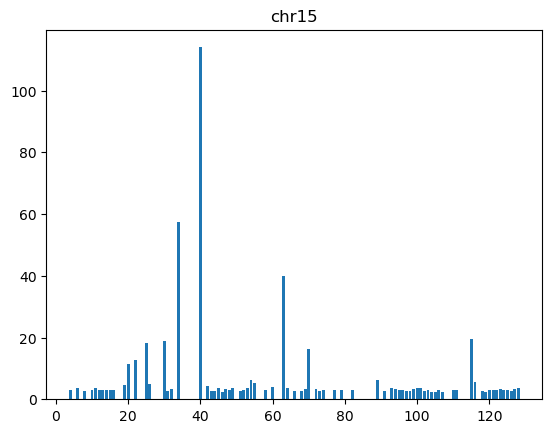

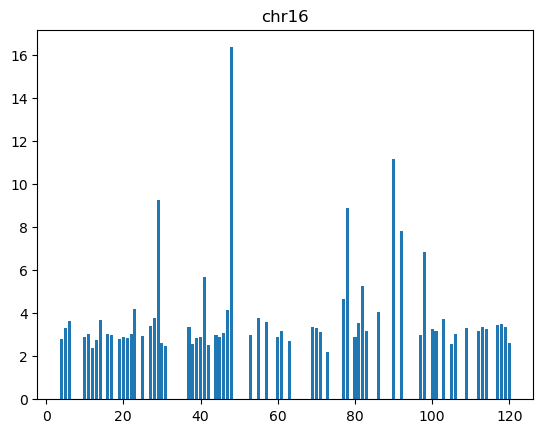

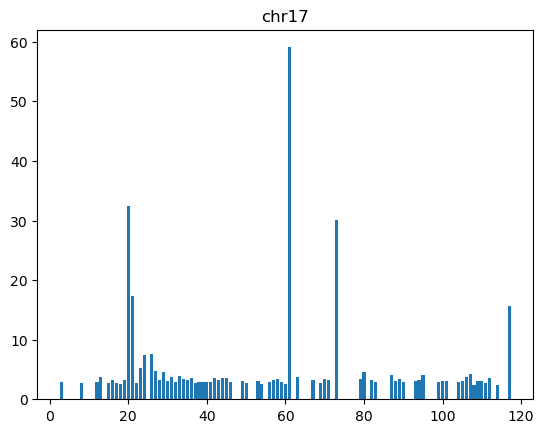

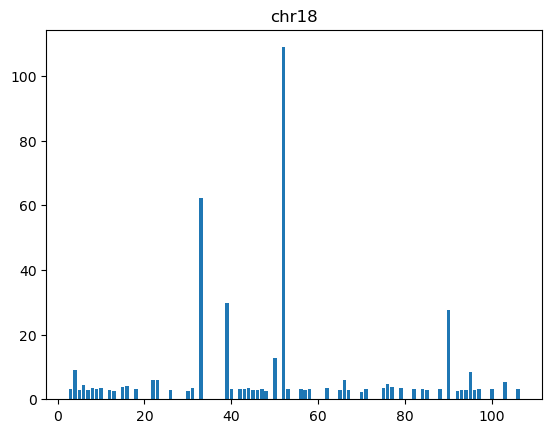

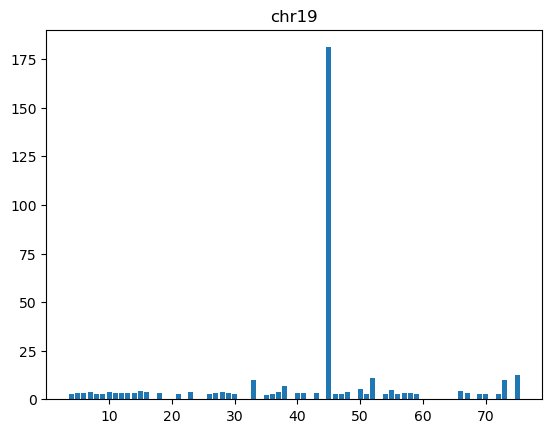

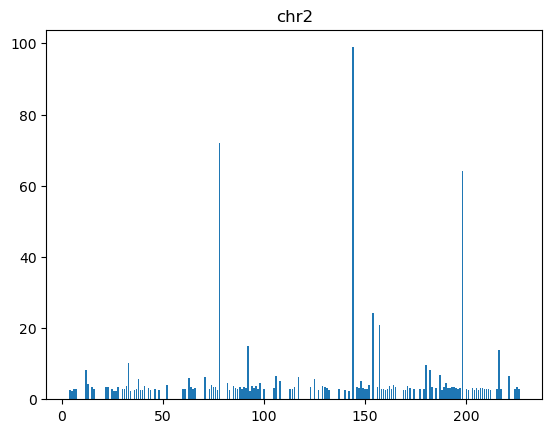

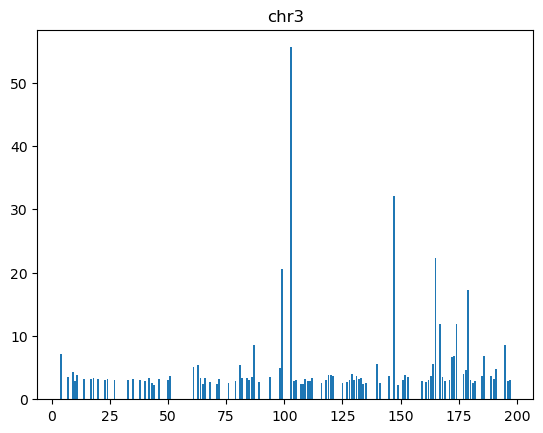

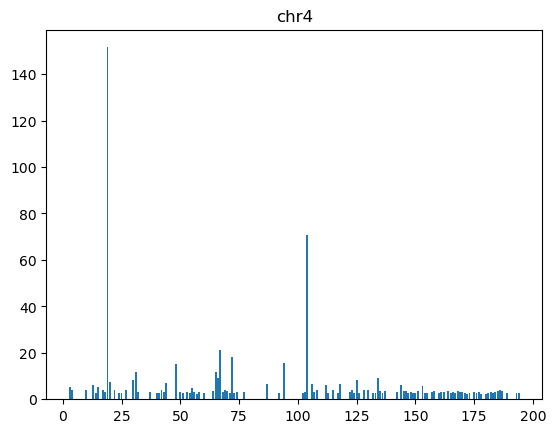

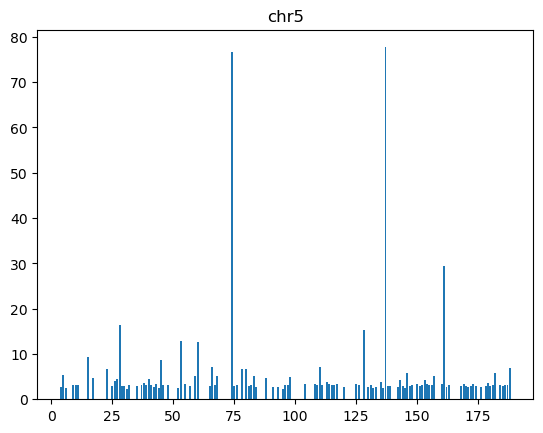

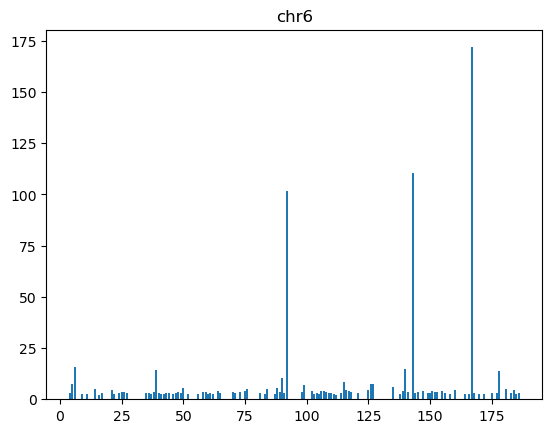

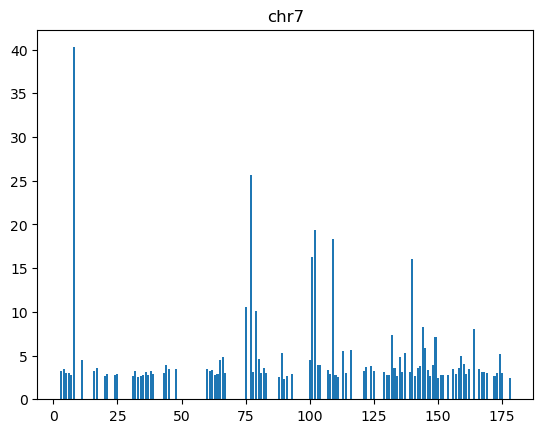

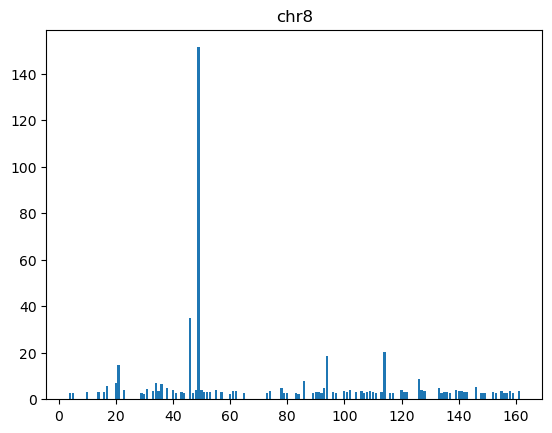

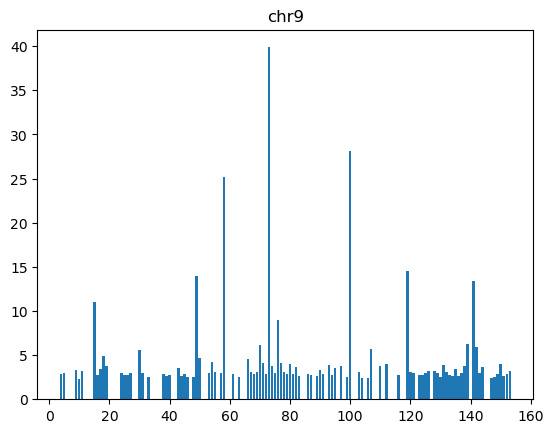

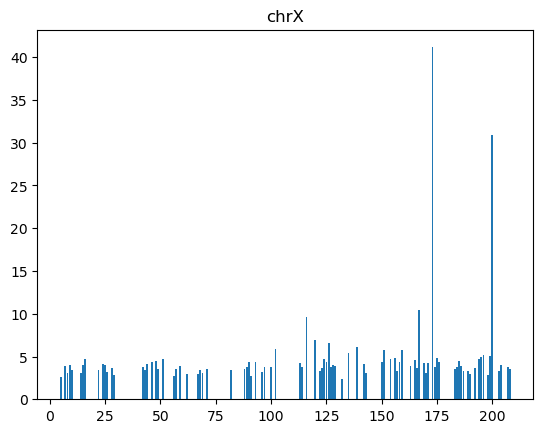

In [15]:

df_HRS_seq["mid"] = df_HRS_seq["deb"] - ((df_HRS_seq["fin"] - df_HRS_seq["deb"])/2)

df_HRS_seq = df_HRS_seq[df_HRS_seq["chromosome"] != "chrY"]

df_HRS_seq_binned = pd.DataFrame(columns=["chromosome",
                                          "counts_HRS",
                                          "bins"])

for title, group in df_HRS_seq.groupby("chromosome"):
    i = 0
    for bin_mouse in mice_bins[title][1:]:
        i += 1
        list_bin = list()

        rows_bin = group.loc[(  (group["mid"] < mice_bins[title][i]) 
                              & (group["mid"] > mice_bins[title][i-1]))]

        mean_bin = rows_bin["FC"].mean()
        

        new_line = {"chromosome" : [title],
                    "counts_HRS" : [mean_bin],
                    "bins" : [bin_mouse]}

        df_bin = pd.DataFrame(new_line)

        df_HRS_seq_binned = pd.concat([df_HRS_seq_binned, df_bin],
                                      axis = 0,
                                      ignore_index = True)
    
for title, group in df_HRS_seq_binned.groupby("chromosome"):
    plt.clf()
    plt.bar(x = range(len(group["bins"])),
            height = group["counts_HRS"],
            edgecolor = None)
    plt.title(title)
    plt.show()



Plotting the comparison between HRS and SPRITE

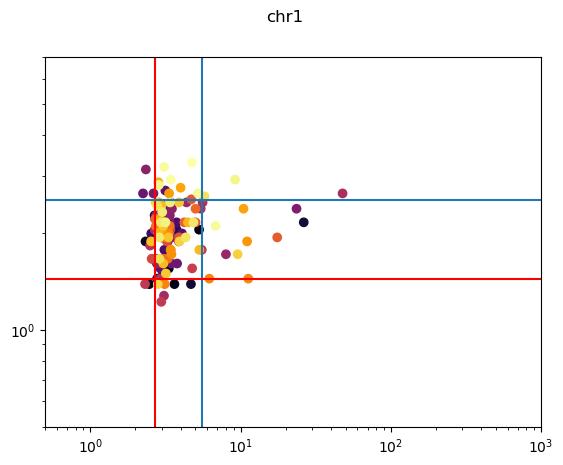

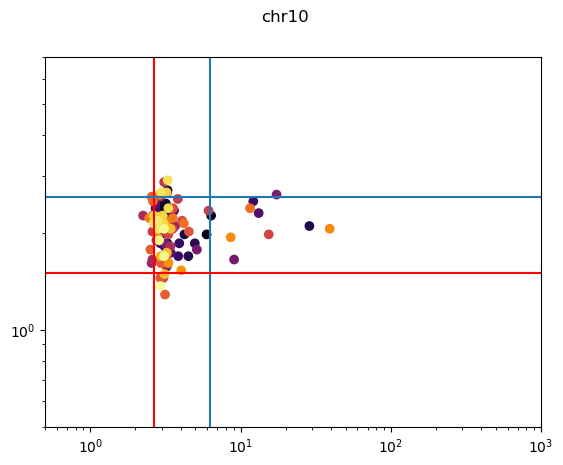

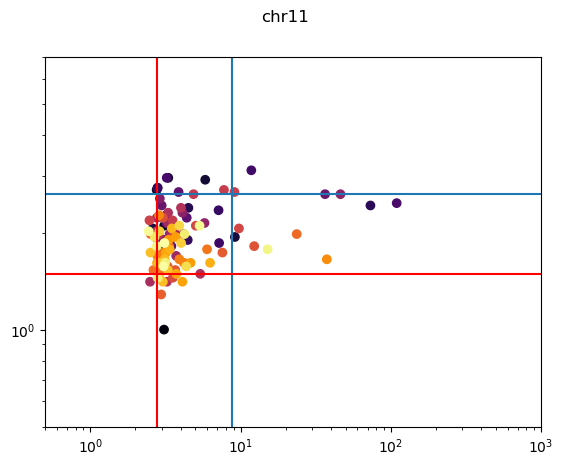

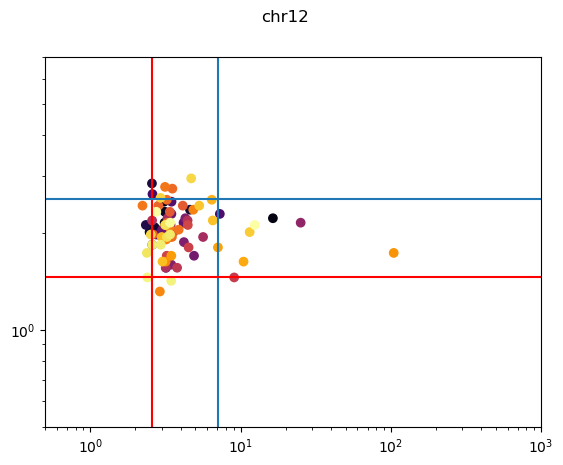

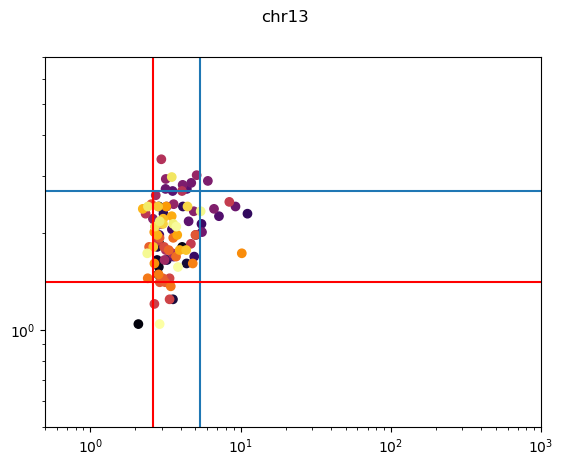

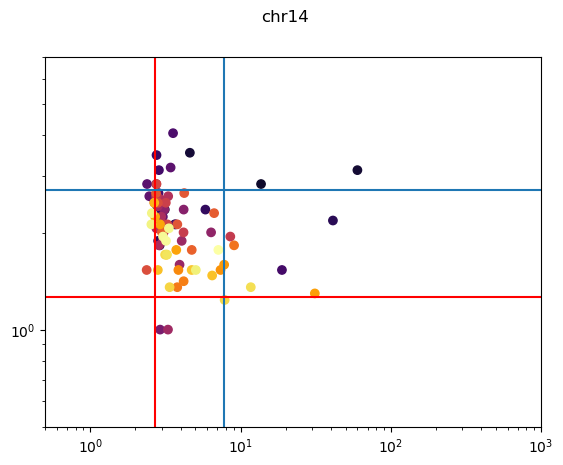

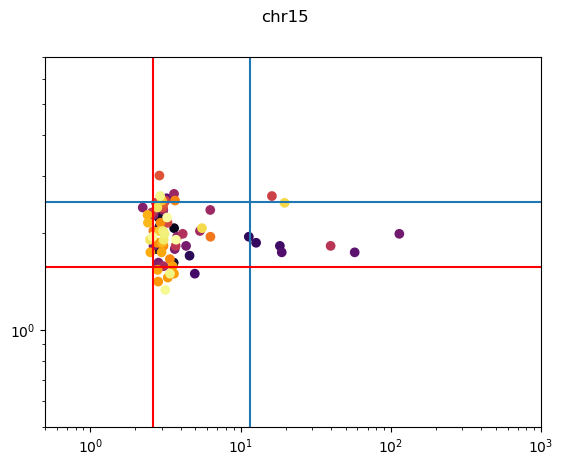

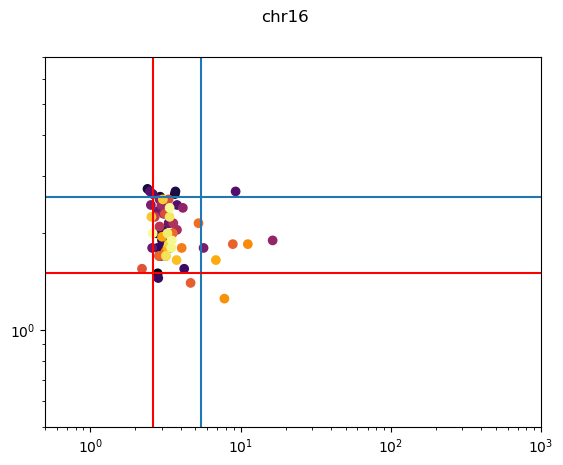

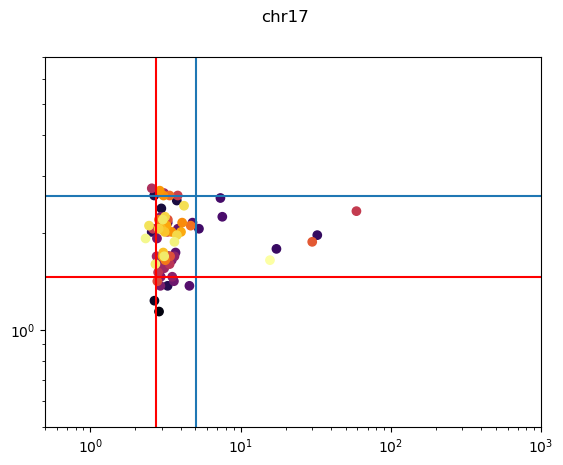

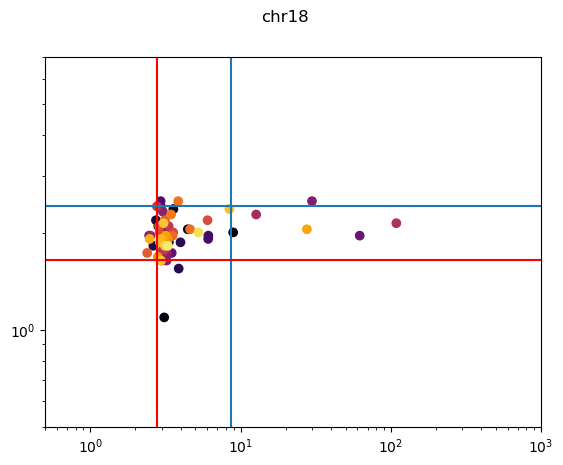

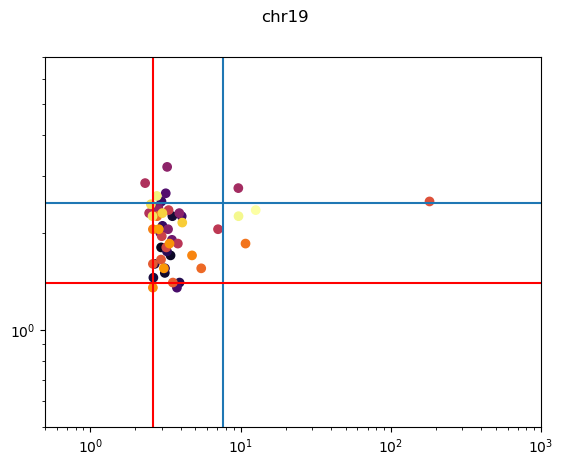

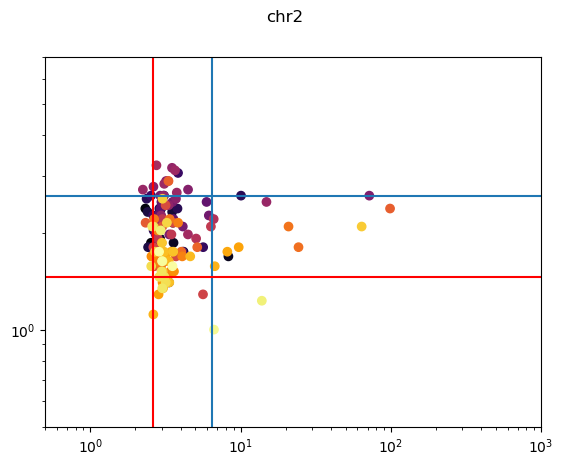

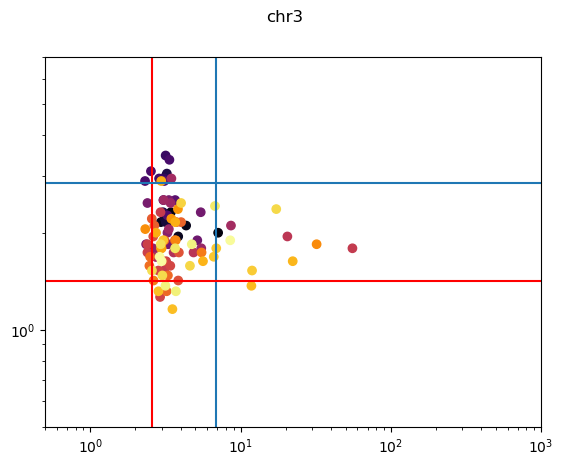

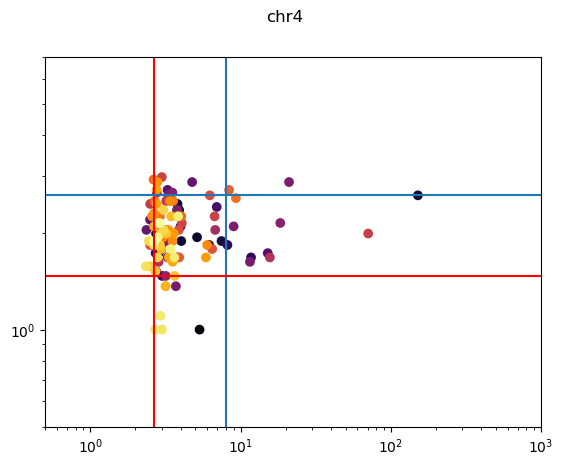

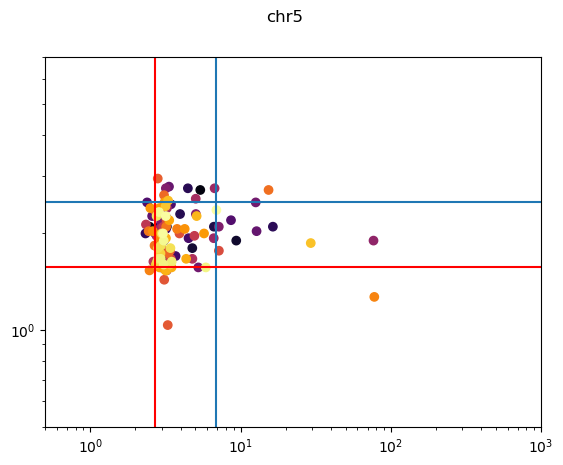

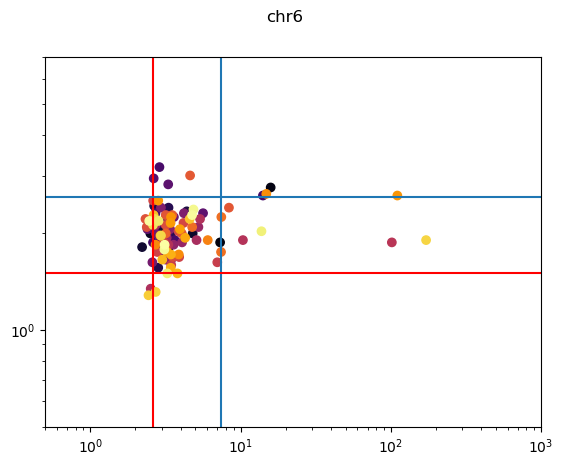

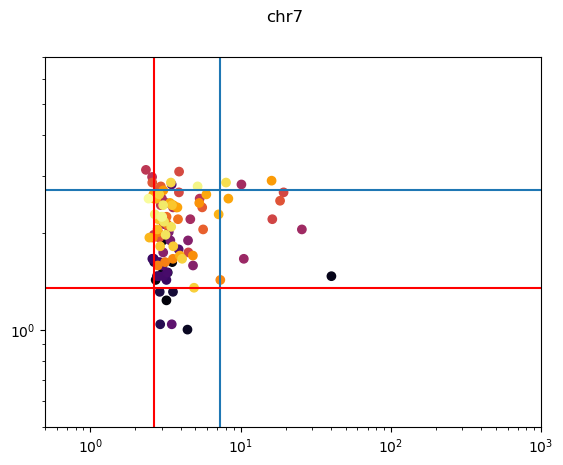

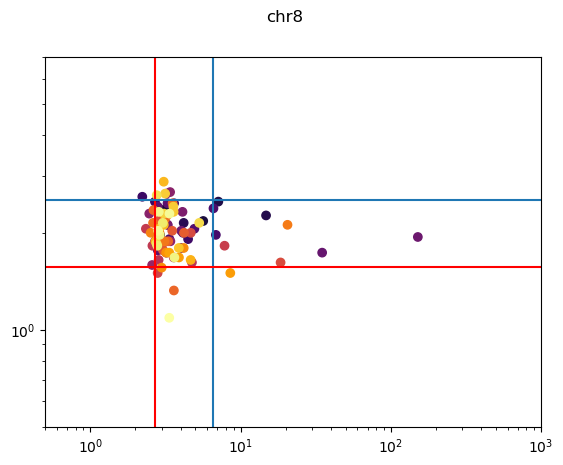

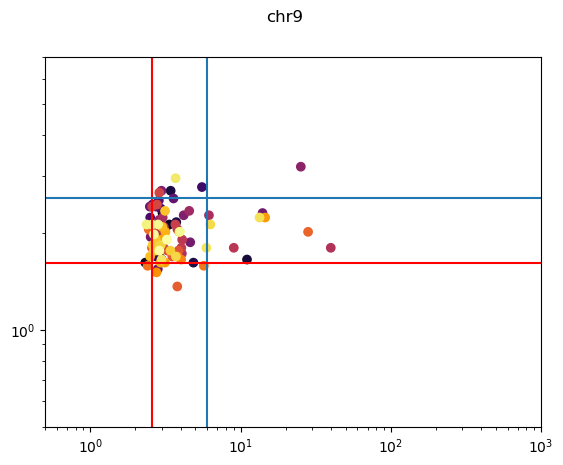

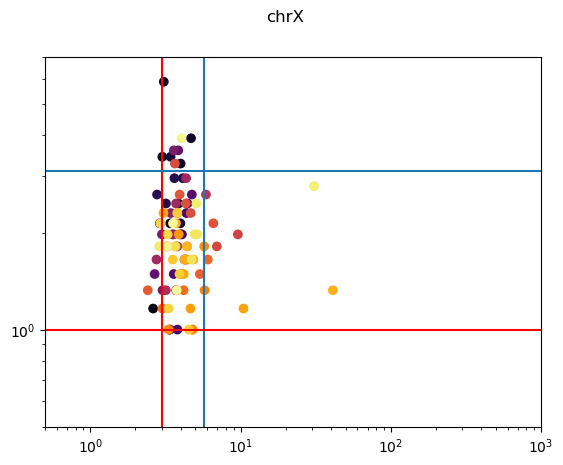

In [55]:
df_comp = pd.merge(df_HRS_seq_binned, 
                   df_contacts_normalised,
                   how = "left",
                   on = ["chromosome", "bins"])


df_quantile_selected = pd.DataFrame(columns = [
                                                "chrom",
                                                "counts_SPRITE",
                                                "FC_HRS",
                                                "bins"
                                                ])

for title, group in df_comp.groupby("chromosome"):
    plt.clf()

    color_scale = 'inferno'  # Choose a color scale from matplotlib.cm
    norm = mcolors.Normalize(vmin=group['bins'].min(), vmax=group['bins'].max())  # Normalize the values

    group['colors'] = group['bins'].apply(lambda x: cm.ScalarMappable(cmap=color_scale, norm=norm).to_rgba(x))
    plt.scatter(x = group["counts_HRS"],
                y = group["counts_normalised"],
                color = group["colors"])
    plt.suptitle(title)
    plt.yscale("log")

    plt.axvline(x = group["counts_HRS"].quantile(q = 0.9))
    plt.axvline(x = group["counts_HRS"].quantile(q = 0.1), color = "red")
    plt.axhline(y = group["counts_normalised"].quantile(q = 0.9))
    plt.axhline(y = group["counts_normalised"].quantile(q = 0.1), color = "red")

    plt.ylim(0.5, 7),
    plt.xlim(0.5, 1000)
    plt.xscale("log")
    plt.show()

    hrs_sprite_rows = group[(group["counts_HRS"] >= group["counts_HRS"].quantile(q = 0.9))
                            & (group["counts_normalised"] >= group["counts_normalised"].quantile(q = 0.9))]

    chrom_group = {
        "chrom"         : np.full(len(hrs_sprite_rows),
                                  title),
        "counts_SPRITE" : hrs_sprite_rows["counts_normalised"],
        "FC_HRS"        : hrs_sprite_rows["counts_HRS"],
        "bins"          : hrs_sprite_rows["bins"]
    }

    df_chrom_group = pd.DataFrame(chrom_group)

    df_quantile_selected = pd.concat([df_quantile_selected,
                                      df_chrom_group],
                                      axis = 0,
                                      ignore_index = True)

Saving the selected values

In [57]:

df_quantile_selected["positions"] = [f"{chrom}:{int(bin-8e5)}-{int(bin)}" for chrom, bin in zip(df_quantile_selected["chrom"], df_quantile_selected["bins"])]
print(df_quantile_selected.head())
path = f"Z:/Nathan/Code/TFL/data/output/last_quantile_SPRITE_HRS_{rna}.csv"
df_quantile_selected.to_csv(path)

   chrom counts_SPRITE     FC_HRS         bins                 positions
0   chr1      2.644485  47.774623   88000000.0    chr1:87200000-88000000
1   chr1      2.589668   5.758328  180000000.0  chr1:179200000-180000000
2   chr1      2.918565   9.190295  188800000.0  chr1:188000000-188800000
3  chr10      2.622294  17.372665   44800000.0   chr10:44000000-44800000
4  chr11      3.119035  11.798628   24800000.0   chr11:24000000-24800000


Importing the gff3 file for mouse genome

In [63]:
path_gff3 = "Z:/Nathan/Code/TFL/data/mouse_genes/gencode.vM32.annotation.gff3"
gencode = pd.read_table("Z:/Nathan/Code/TFL/data/mouse_genes/gencode.vM32.annotation.gff3", comment="#",
                        sep = "\t", names = ['seqname', 'source', 'feature', 'start' , 'end', 'score', 'strand', 'frame', 'attribute'])


gencode_genes = gencode[(gencode.feature == "gene")][["seqname", 
                                                       "start",
                                                       "end",
                                                       "attribute"]].copy().reset_index().drop("index", axis=1)

gencode_genes.head()

"""def gene_info(x):
    # Extract gene names
    g_name = list(filter(lambda x: 'gene_name' in x,  x.split(";")))[0].split("=")[1]
    g_type = list(filter(lambda x: 'gene_type' in x,  x.split(";")))[0].split("=")[1]
    g_status = list(filter(lambda x: 'gene_status' in x,  x.split(";")))[0].split("=")[1]
    g_leve = int(list(filter(lambda x: 'level' in x,  x.split(";")))[0].split("=")[1])
    return (g_name, g_type, g_status, g_leve)



gencode_genes["gene_name"], gencode_genes["gene_type"], gencode_genes["gene_status"], gencode_genes["gene_level"] = zip(*gencode_genes.attribute.apply(lambda x: gene_info(x)))
gencode_genes.head()


gencode_genes['gene_type'].drop_duplicates()


def overlap(q_st, q_end, res_st, res_end):
    o  = min(q_end, res_end)-max(q_st, res_st)
    return o


"""


'def gene_info(x):\n    # Extract gene names\n    g_name = list(filter(lambda x: \'gene_name\' in x,  x.split(";")))[0].split("=")[1]\n    g_type = list(filter(lambda x: \'gene_type\' in x,  x.split(";")))[0].split("=")[1]\n    g_status = list(filter(lambda x: \'gene_status\' in x,  x.split(";")))[0].split("=")[1]\n    g_leve = int(list(filter(lambda x: \'level\' in x,  x.split(";")))[0].split("=")[1])\n    return (g_name, g_type, g_status, g_leve)\n\n\n\ngencode_genes["gene_name"], gencode_genes["gene_type"], gencode_genes["gene_status"], gencode_genes["gene_level"] = zip(*gencode_genes.attribute.apply(lambda x: gene_info(x)))\ngencode_genes.head()\n\n\ngencode_genes[\'gene_type\'].drop_duplicates()\n\n\ndef overlap(q_st, q_end, res_st, res_end):\n    o  = min(q_end, res_end)-max(q_st, res_st)\n    return o\n\n\n'

Allocating each region to it's corresponding genes